In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and understand the dataset

## Import and setup

In [2]:
import os
from pathlib import Path
curr_dir = Path(os.getcwd())
data_dir = curr_dir.parent.parent / "data" / "train_FD001.txt"
df = pd.read_csv(data_dir, delimiter=" ")
df.columns = (
    ["Engine no", "Num cycles", "Operating 1", "Operating 2", "Operating 3", "Operating 4"] +
    [f"Sensor {i}" for i in range(22)]  # 28 - 6
)

In [3]:
df.describe()

,Engine no,Num cycles,Operating 1,Operating 2,Operating 3,Operating 4,Sensor 0,Sensor 1,Sensor 2,Sensor 3,...,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.0,2.063000e+04,20630.000000,20630.000000,20630.000000,2.063000e+04,...,20630.000000,20630.000000,2.063000e+04,20630.000000,20630.0,20630.0,20630.000000,20630.000000,0.0,0.0
mean,51.509016,108.813088,-0.000009,0.000002,100.0,5.186700e+02,642.680975,1590.523159,1408.934186,1.462000e+01,...,8143.752971,8.442147,3.000000e-02,393.210713,2388.0,100.0,38.816259,23.289699,NaN,NaN
std,29.226226,68.878570,0.002187,0.000293,0.0,6.537152e-11,0.500029,6.131295,9.000636,3.394700e-12,...,19.076605,0.037506,1.556432e-14,1.548778,0.0,0.0,0.180743,0.108250,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.330000,1586.260000,1402.360000,1.462000e+01,...,8133.242500,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,-0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438950,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.557500,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [4]:
train_df = df.drop(
    ["Operating 1", "Operating 2", "Operating 3", "Operating 4", "Num cycles"] +
    [f"Sensor {i}" for i in [3, 4, 8, 14, 16, 17, 20, 21]],
    axis=1,
    inplace=False
)

In [5]:
train_df.head()

,Engine no,Sensor 0,Sensor 1,Sensor 2,Sensor 5,Sensor 6,Sensor 7,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 15,Sensor 18,Sensor 19
0,1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
1,1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
2,1,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
3,1,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
4,1,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Engine no  20630 non-null  int64  
 1   Sensor 0   20630 non-null  float64
 2   Sensor 1   20630 non-null  float64
 3   Sensor 2   20630 non-null  float64
 4   Sensor 5   20630 non-null  float64
 5   Sensor 6   20630 non-null  float64
 6   Sensor 7   20630 non-null  float64
 7   Sensor 9   20630 non-null  float64
 8   Sensor 10  20630 non-null  float64
 9   Sensor 11  20630 non-null  float64
 10  Sensor 12  20630 non-null  float64
 11  Sensor 13  20630 non-null  float64
 12  Sensor 15  20630 non-null  int64  
 13  Sensor 18  20630 non-null  float64
 14  Sensor 19  20630 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 2.4 MB


## Understanding the data

In [7]:
def plot_engine_vs_sensors(engine_number: int):
    """
    Plots a grid (5, 3) with engine-cycle number vs sensor-data.

    Args:
        engine_number (int): read the var name
    """
    engine_1_data = train_df[train_df["Engine no"] == engine_number].drop("Engine no", axis=1)
    fig, axes = plt.subplots(5, 3, figsize=(15, 12))  # Adjust figsize as needed
    axes = axes.flatten()
    fig.suptitle(f"Engine: {engine_number}", fontsize=18)
    
    for i, column in enumerate(engine_1_data.columns):
        axes[i].plot(range(len(engine_1_data[column])), engine_1_data[column])
        axes[i].set_title(column)
        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Value")
        axes[i].grid(True)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    plt.tight_layout()
    plt.show()

In [8]:
train_df.nunique(axis=0)

Engine no     100
Sensor 0      310
Sensor 1     3012
Sensor 2     4051
Sensor 5      513
Sensor 6       53
Sensor 7     6403
Sensor 9      159
Sensor 10     427
Sensor 11      56
Sensor 12    6078
Sensor 13    1918
Sensor 15      13
Sensor 18     120
Sensor 19    4745
dtype: int64

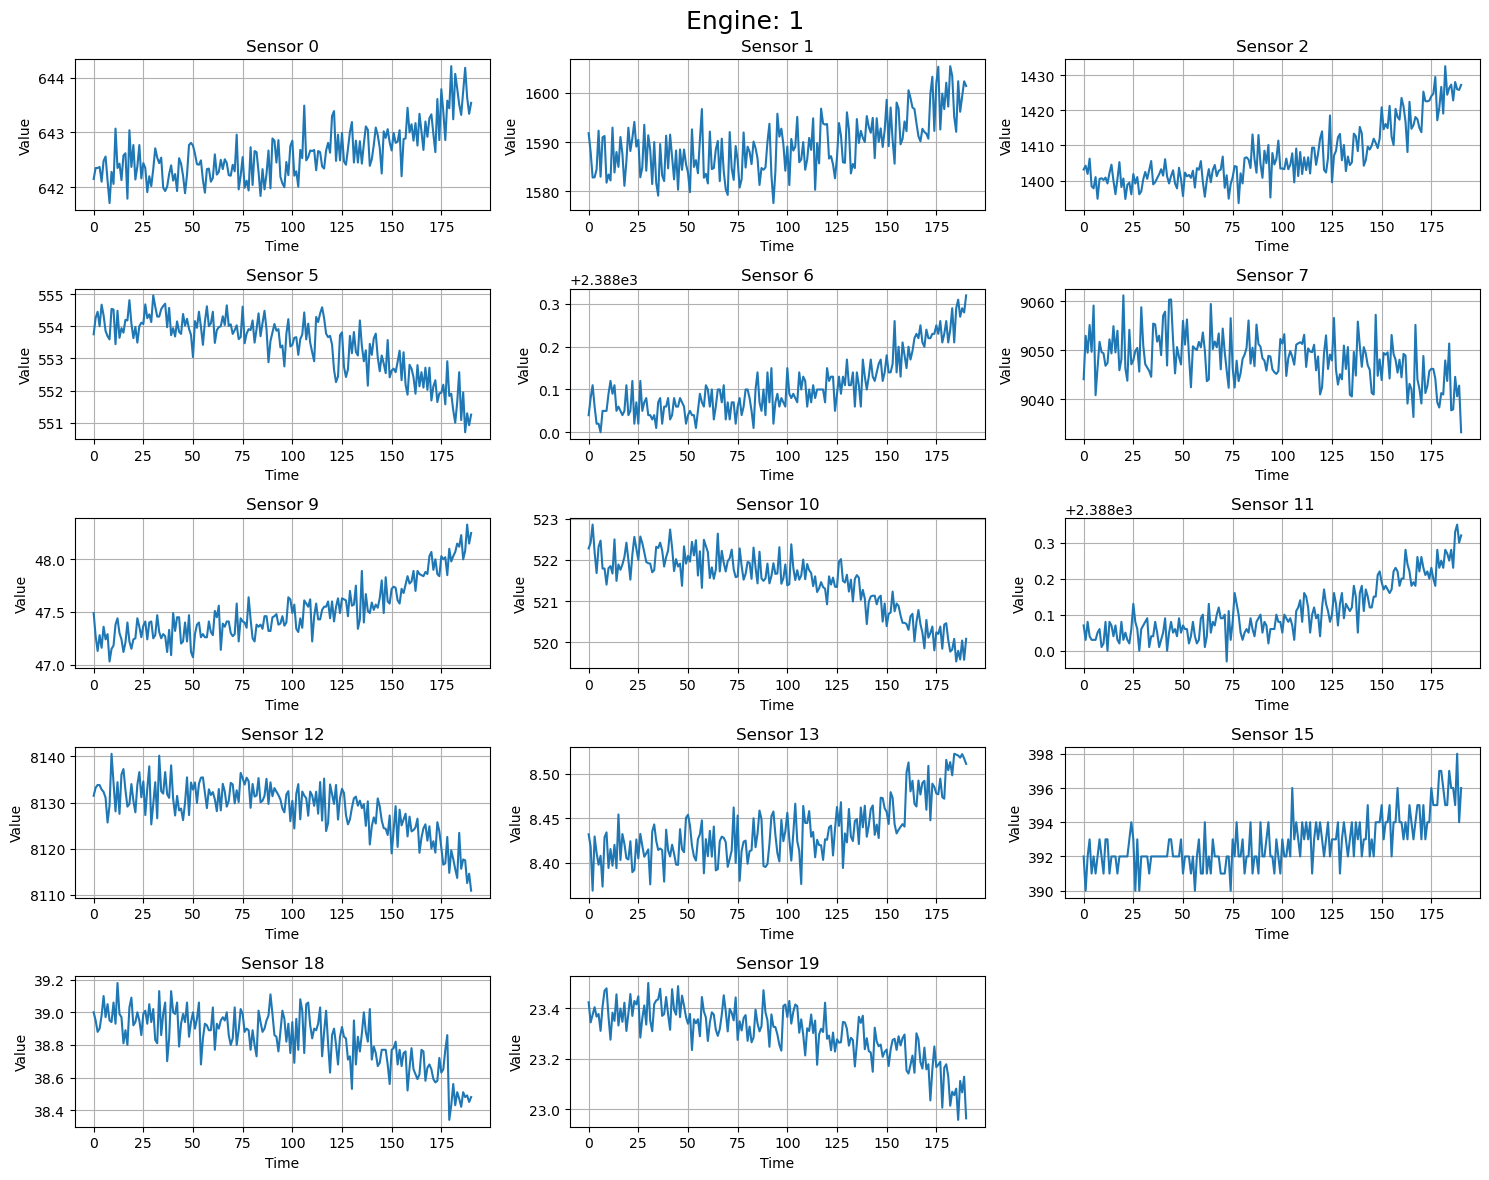

In [9]:
plot_engine_vs_sensors(1)

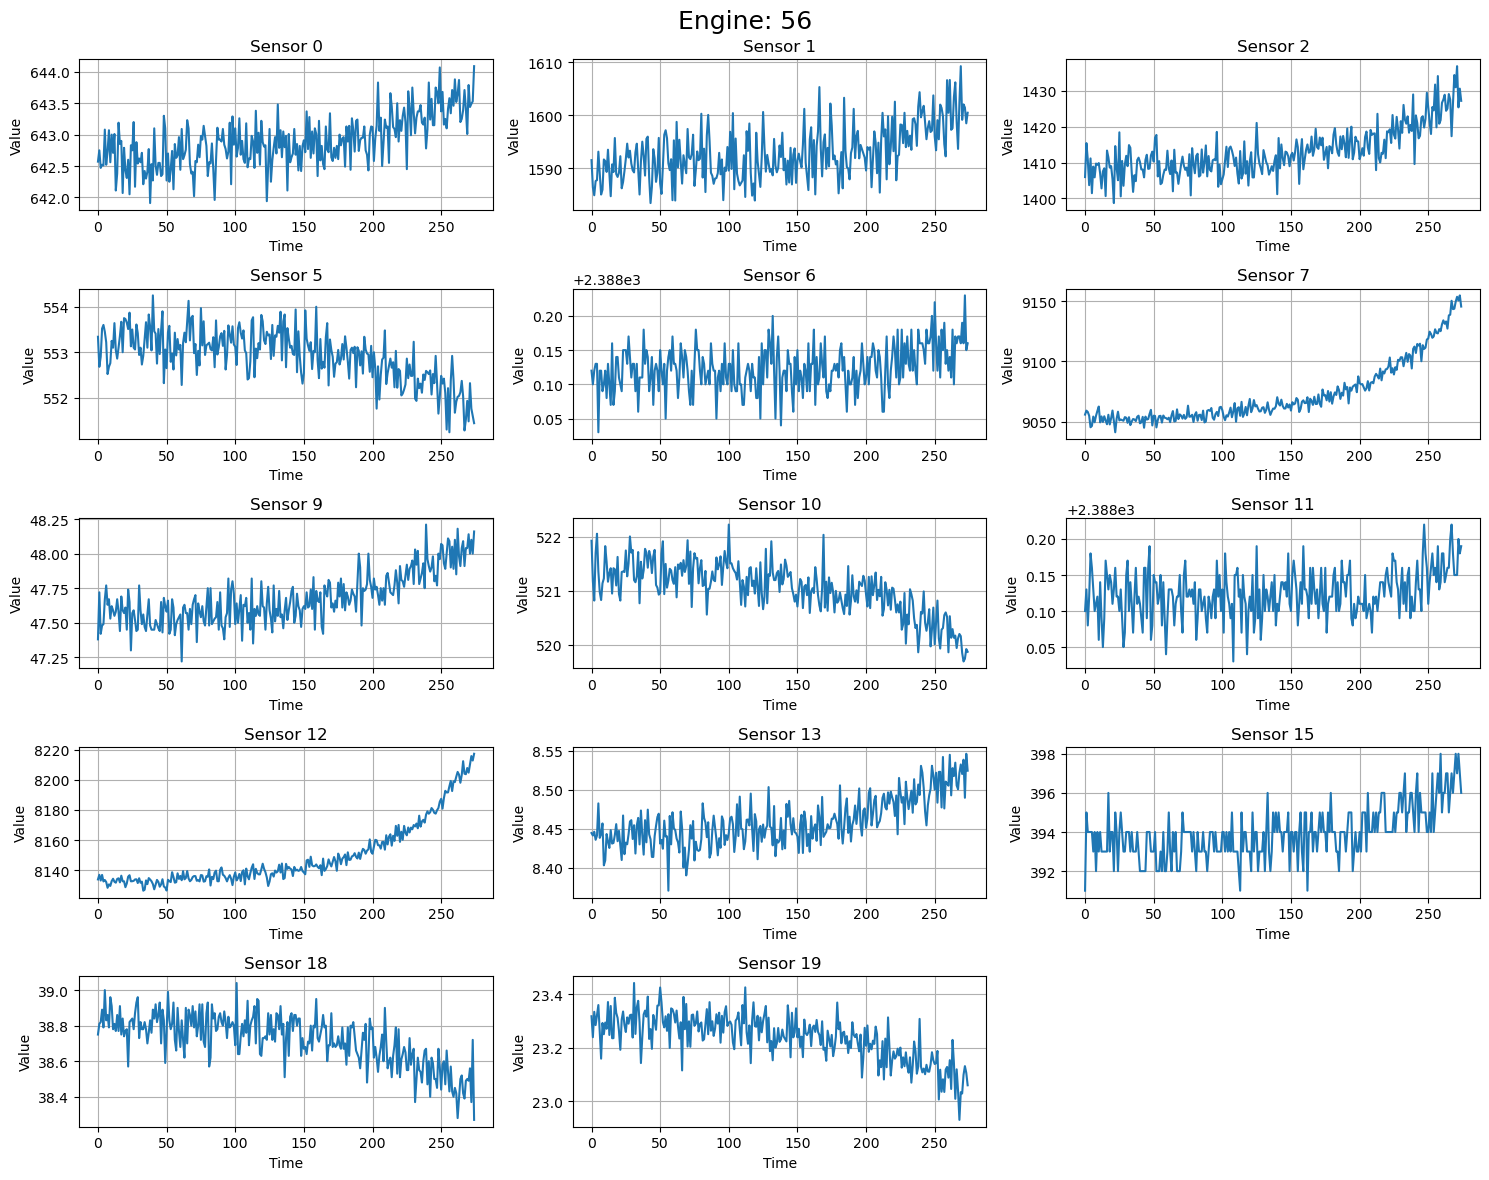

In [10]:
plot_engine_vs_sensors(56)

In [11]:
train_df.describe()

,Engine no,Sensor 0,Sensor 1,Sensor 2,Sensor 5,Sensor 6,Sensor 7,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 15,Sensor 18,Sensor 19
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000
mean,51.509016,642.680975,1590.523159,1408.934186,553.367663,2388.096653,9065.243864,47.541172,521.413458,2388.096156,8143.752971,8.442147,393.210713,38.816259,23.289699
std,29.226226,0.500029,6.131295,9.000636,0.885087,0.070987,22.083016,0.267093,0.737569,0.071919,19.076605,0.037506,1.548778,0.180743,0.108250
min,1.000000,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200
25%,26.000000,642.330000,1586.260000,1402.360000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.242500,8.414900,392.000000,38.700000,23.221800
50%,52.000000,642.640000,1590.100000,1408.040000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438950,393.000000,38.830000,23.297900
75%,77.000000,643.000000,1594.380000,1414.557500,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800
max,100.000000,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400


In [12]:
from typing import List

def engine_vs_single_sensor(engine_numbers: List[int], sensor_number: int):
    """
    Plots a grid (5, N) with engine-cycle number vs sensor-data for a given sensor.

    Args:
        engine_numbers (List[int]): List of engine numbers to plot (should be a multiple of 5 for clean layout).
        sensor_number (int): Sensor number (e.g., 1 for "Sensor 1").
    """
    if len(engine_numbers) % 5 != 0:
        raise ValueError("engine_numbers list length should be a multiple of 5 for a clean (5, N) grid layout.")
    
    num_cols = len(engine_numbers) // 5
    fig, axes = plt.subplots(5, num_cols, figsize=(num_cols * 4, 15))
    axes = axes.flatten()

    for i, engine_no in enumerate(engine_numbers):
        data = train_df[train_df["Engine no"] == engine_no][f"Sensor {sensor_number}"]
        axes[i].plot(data.values)
        axes[i].set_title(f"Engine {engine_no}")
        axes[i].set_xlabel("Cycle")
        axes[i].set_ylabel(f"Sensor {sensor_number}")
        axes[i].grid(True)

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(f"Sensor {sensor_number} across Engines", fontsize=18)
    plt.show()

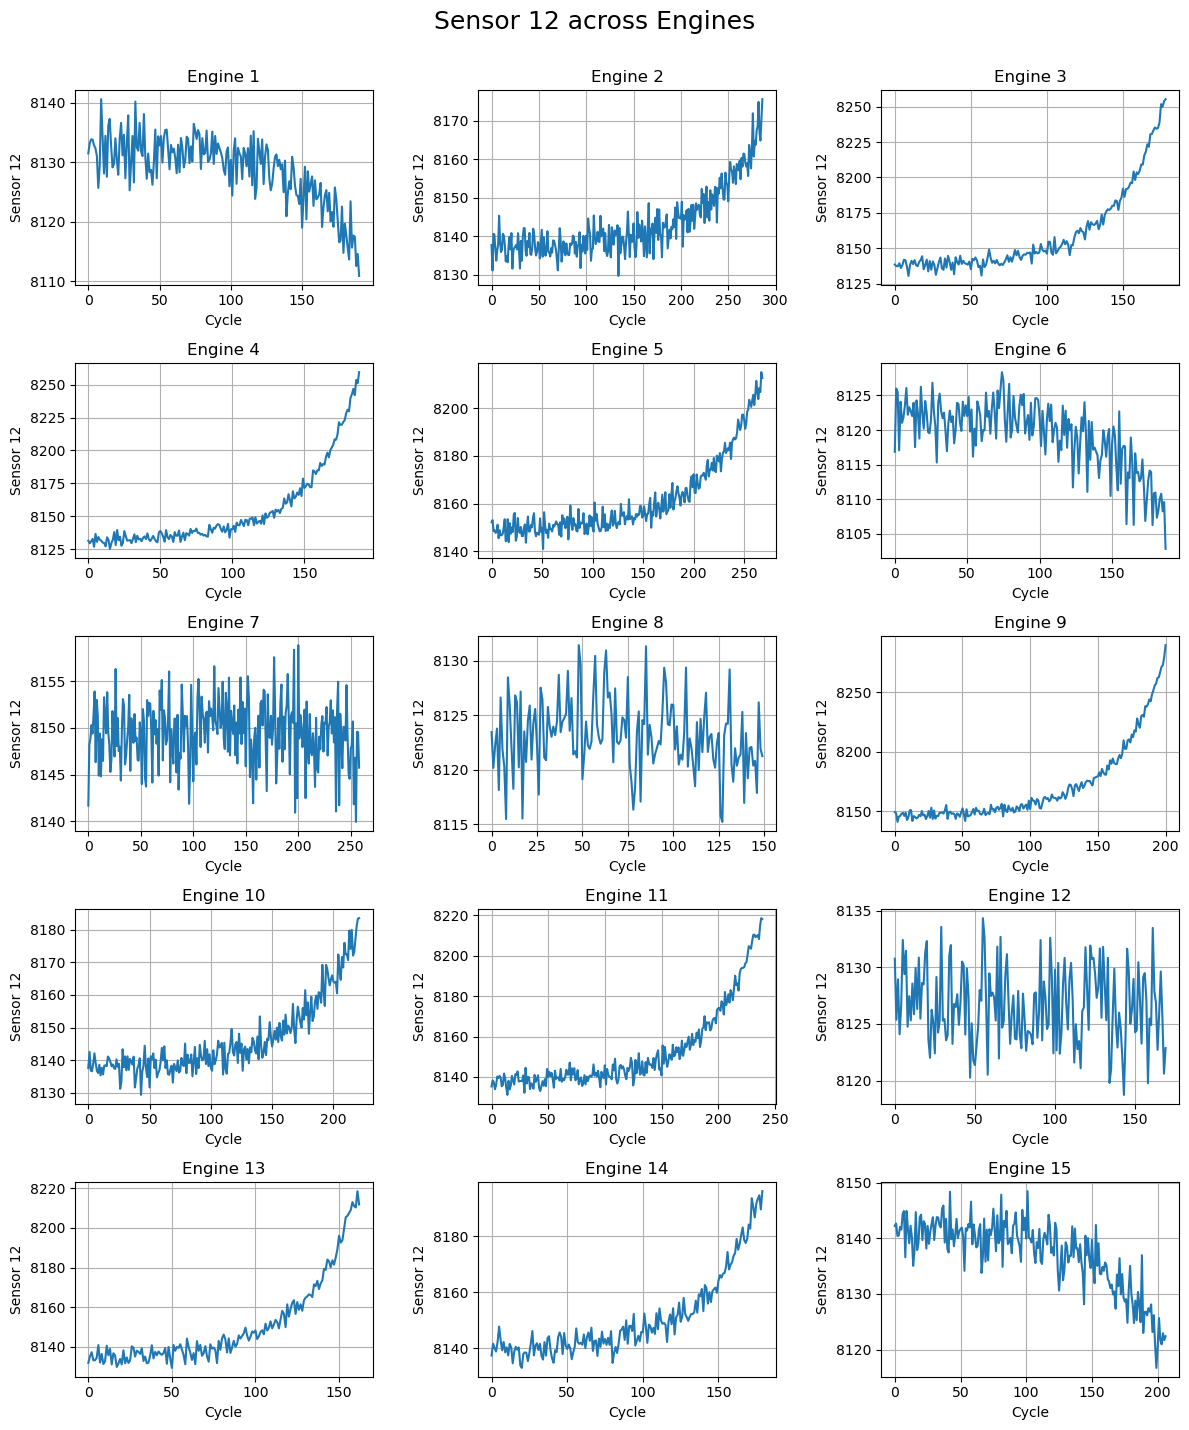

In [13]:
engine_vs_single_sensor(range(1, 15+1), 12)

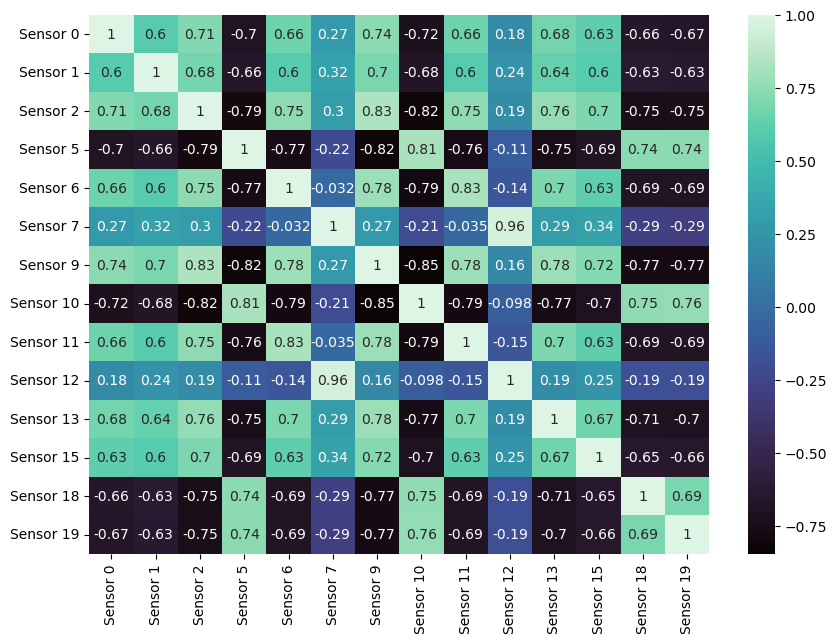

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(train_df.drop(["Engine no"], axis=1).corr(), cmap="mako", annot=True)
plt.show();

**We have a corr-mat, we CAN do stuff with it. But we dont't know what to do with it.**

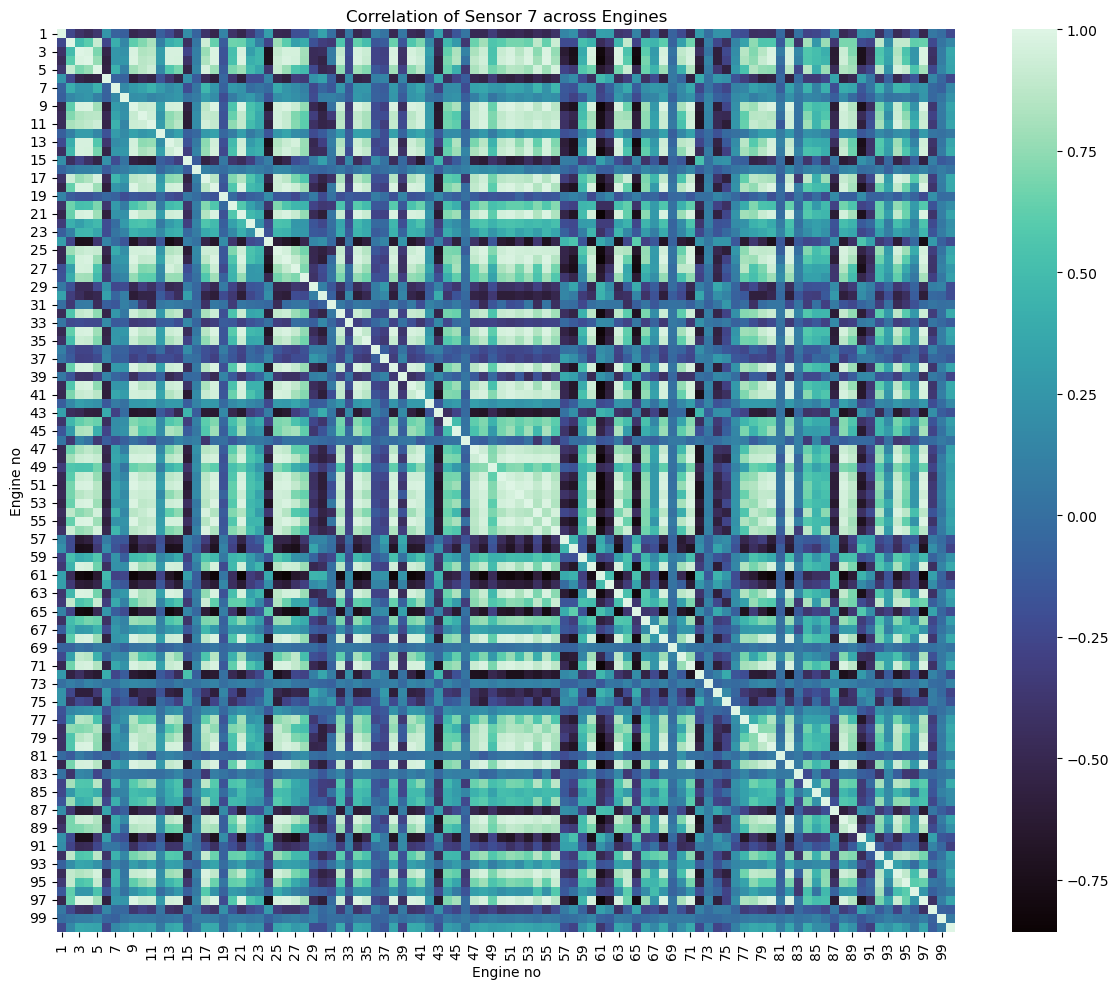

In [15]:
# Create a cycle index per engine to align the time series
train_df = train_df.copy()  # just to avoid modifying original
train_df["Cycle"] = train_df.groupby("Engine no").cumcount()

# Pivot: rows = Cycle, columns = Engine no, values = Sensor 7
sensor_7_pivot = train_df.pivot(index="Cycle", columns="Engine no", values="Sensor 7")

# Drop columns (engines) with too much missing data (optional)
sensor_7_pivot = sensor_7_pivot.dropna(axis=1, thresh=5)  # keep only engines with >=5 cycles

# Compute the correlation matrix between engines
corr_matrix = sensor_7_pivot.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="mako", annot=False)
#sns.heatmap(corr_matrix, cmap="viridis", annot=False)
plt.title("Correlation of Sensor 7 across Engines")
plt.tight_layout()
plt.show();

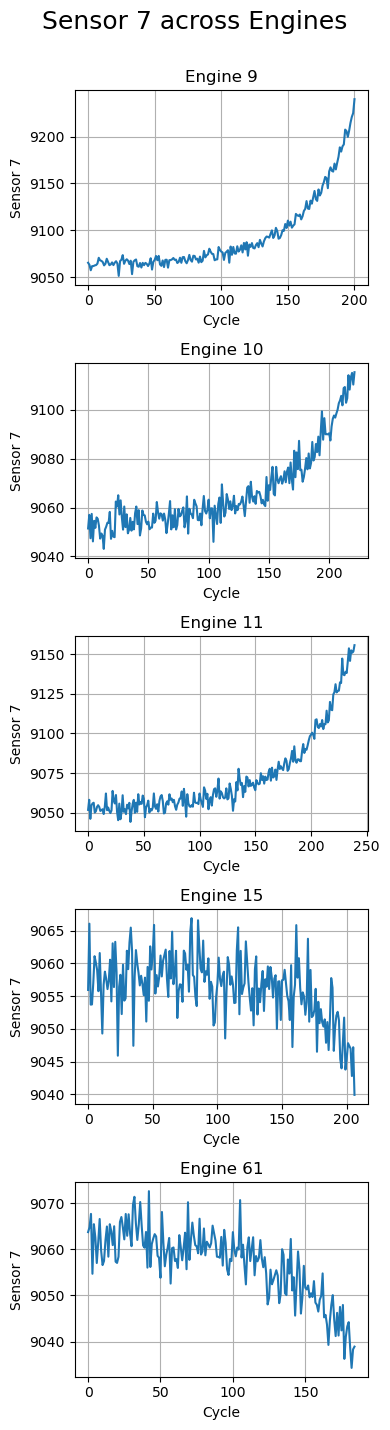

In [16]:
engine_vs_single_sensor([9, 10, 11, 15, 61], 7)

# Data splits

In [17]:
train_df.head(3)

,Engine no,Sensor 0,Sensor 1,Sensor 2,Sensor 5,Sensor 6,Sensor 7,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 15,Sensor 18,Sensor 19,Cycle
0,1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0
1,1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,1
2,1,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,2


In [19]:
from sklearn.model_selection import train_test_split
X = train_df.drop(["Engine no", "Cycle"], axis=1).to_numpy()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, shuffle=True)

X.shape, X_train.shape, X_test.shape

((20630, 14), (16504, 14), (4126, 14))

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_min_max = MinMaxScaler()
scaler_std = StandardScaler()

X_train_min_max = scaler_min_max.fit_transform(X_train)
X_train_std = scaler_std.fit_transform(X_train)

X_train_min_max.shape, X_train_std.shape

((16504, 14), (16504, 14))

In [46]:
min(X_train_min_max.flatten()), max(X_train_min_max.flatten())

(np.float64(0.0), np.float64(1.0))

In [47]:
min(X_train_std.flatten()), max(X_train_std.flatten())

(np.float64(-3.9503673538592574), np.float64(8.080406344554282))

# Clustering

|Clustering algo|
|-|
|KMeans|
|Agglomerative|
|DBSCAN|
|HDBSCAN|



## KMeans

In [22]:
from sklearn.cluster import KMeans
model_1 = KMeans(
    n_clusters=5,
    max_iter=300,
    random_state=42,
)
model_1.fit(X_train)

KMeans(n_clusters=5, random_state=42)

In [24]:
labels_1 = model_1.predict(X_train)
labels_1.shape, labels_1[:5]

((16504,), array([3, 3, 1, 0, 0], dtype=int32))

In [39]:
model_1_min_max = KMeans(
    n_clusters=5,
    max_iter=300,
    random_state=42,
)
model_1_min_max.fit(X_train_min_max)

KMeans(n_clusters=5, random_state=42)

In [41]:
labels_1_min_max = model_1_min_max.predict(X_train_min_max)
labels_1_min_max.shape, labels_1_min_max[:5]

((16504,), array([3, 3, 4, 0, 0], dtype=int32))

In [40]:
model_1_std = KMeans(
    n_clusters=5,
    max_iter=300,
    random_state=42,
)
model_1_std.fit(X_train_std)

KMeans(n_clusters=5, random_state=42)

In [42]:
labels_1_std = model_1_std.predict(X_train_std)
labels_1_std.shape, labels_1_std[:5]

((16504,), array([2, 2, 0, 0, 0], dtype=int32))

**PCA**

In [69]:
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
import seaborn as sns

from sklearn.decomposition import PCA
def plot_pca_2d(X_data, labels, title):
    """
    Plots a PCA plot in 2D only
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)
    pca_df = pd.DataFrame(data=X_pca,
                          columns=['PC1', 'PC2'])
    pca_df['target'] = labels
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set2')
    plt.title(title)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
    plt.legend()
    plt.tight_layout()
    plt.show();

def plot_pca_2d_density(X_data, labels, title):
    """
    Plots a PCA plot in 2D with opacity based on density
    """
    # PCA transformation
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    pca_df['target'] = labels

    # Density estimation
    xy = np.vstack([pca_df['PC1'], pca_df['PC2']])
    z = gaussian_kde(xy)(xy)
    pca_df['density'] = z

    # Normalize density to [0.1, 1] for alpha values (avoid fully invisible points)
    density_scaled = (z - z.min()) / (z.max() - z.min())
    pca_df['alpha'] = 0.1 + 0.9 * density_scaled  # scale between 0.1 and 1

    # Plot
    plt.figure(figsize=(8,6))
    for target_class in pca_df['target'].unique():
        subset = pca_df[pca_df['target'] == target_class]
        plt.scatter(
            subset['PC1'], subset['PC2'],
            label=target_class,
            alpha=subset['alpha'],
            edgecolor='none'
        )

    plt.title(title)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
    plt.legend()
    plt.tight_layout()
    plt.show();

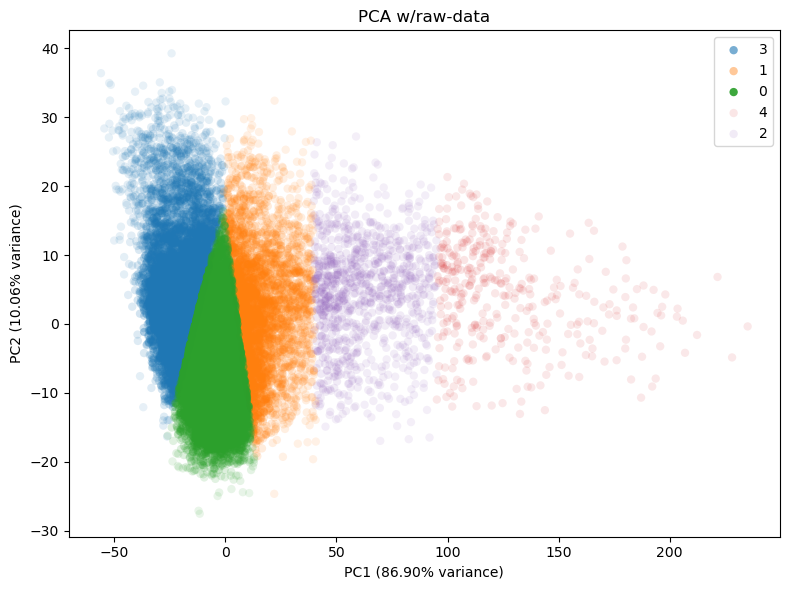

In [66]:
# Plot for the "normal" model
plot_pca_2d_density(X_train, labels_1, "PCA w/raw-data")

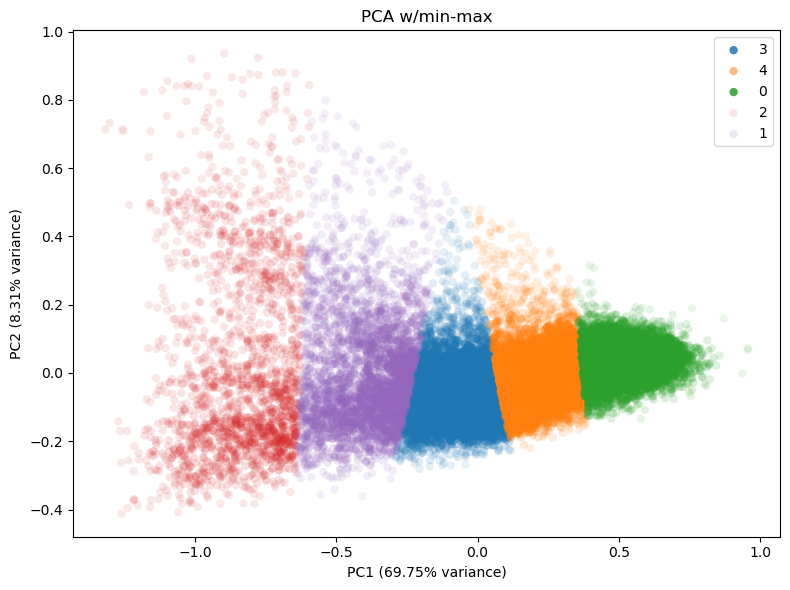

In [67]:
# Plot for the "min-max" model
plot_pca_2d_density(X_train_min_max, labels_1_min_max, "PCA w/min-max")

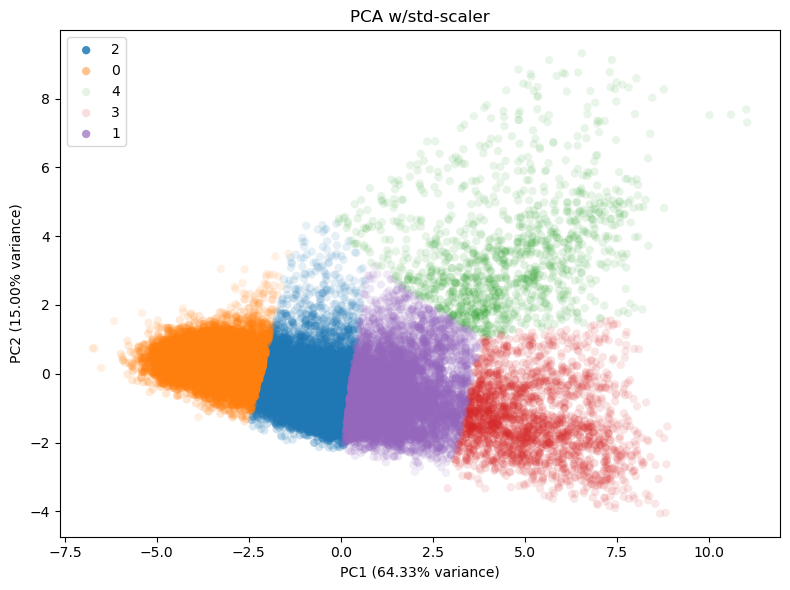

In [68]:
# Plot for the "normal" model
plot_pca_2d_density(X_train_std, labels_1_std, "PCA w/std-scaler")